In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support.select import Select
import pandas as pd
import numpy as np
from string import digits
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score


ריצה על האתר https://www.wunderground.com/history/daily/il/haifa/LLHA

בעזרת הסלניום רצנו על האתר והוצאנו ממנו את הנתונים מהטבלה

In [46]:
driver = webdriver.Chrome('C:/Users/noamr/OneDrive/Desktop/לימודים/chromedriver.exe')
driver.get('https://www.wunderground.com/history/daily/il/haifa/LLHA')

<ipython-input-46-295afdde78d4>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/Users/noamr/OneDrive/Desktop/לימודים/chromedriver.exe')


בנינו רשימות כדי ליצור מהם את הדאטה פריים

In [47]:
time=[]
temp=[]
dewP=[]
humi=[]
wind=[]
windS=[]
wimdG=[]
press=[]
prec=[]
cond=[]
dayl=[]
monthl=[]
yearl=[]
lists_list=(time,temp,dewP,humi,wind,windS,wimdG,press,prec,cond)

יצרנו פונקציה שמכניסה שמבודדת את התאים בטבלה שבאתר  ומכניסה כל מידע של תא לרשימה המתאימה לו

In [48]:
def listing(nday2,nmonth2,nyear2):
    wait = WebDriverWait(driver, 10, poll_frequency=1)
    element = wait.until(EC.element_to_be_clickable((By.ID,'yearSelection')))
    elements = driver.find_elements(By.TAG_NAME, 'td')
    i=0



    while i<len(elements):
        for j in lists_list:
            j.append(elements[i].text)
            i=i+1
        dayl.append(nday2)
        monthl.append(nmonth2)
        yearl.append(nyear2)
                

בעזרת סלניום העברנו ימים מה1.1.2019 עד ה31.12.2019
ובכל יום קראנו לפונקציה שהגדרנו למעלה כדי להכניס את המידע מהטבלה של אותו היום

In [ ]:
wait = WebDriverWait(driver, 10, poll_frequency=1)
element = wait.until(EC.element_to_be_clickable((By.ID,'yearSelection')))

for year in range(1, 4):
    select_element3 = driver.find_element(By.ID,'yearSelection')
    select_object3 = Select(select_element3)
    select_object3.select_by_index(year)
    for mon in range(12):
        select_element1 = driver.find_element(By.ID,'monthSelection')
        select_object1 = Select(select_element1)
        select_object1.select_by_index(mon)
        select_element2 = driver.find_element(By.ID,'daySelection')
        select_object2 = Select(select_element2)
        dayRange = select_object2.options
        for day in range(len(dayRange)):
            wait = WebDriverWait(driver, 10, poll_frequency=1)
            element = wait.until(EC.element_to_be_clickable((By.ID,'yearSelection')))
            select_element2 = driver.find_element(By.ID,'daySelection')
            select_object2 = Select(select_element2)
            select_object2.select_by_index(day)
            view = driver.find_element(By.ID, "dateSubmit")
            view.click()
            listing(day+1,mon+1,2022-year)

הכנסנו את הרשימות המלאות לתוך דאטה פריים

In [ ]:
lists_list=(time,temp,dewP,humi,wind,windS,wimdG,press,prec,cond)
df = pd.DataFrame(list(zip(time,temp,dewP,humi,wind,windS,wimdG,press,prec,cond,dayl,monthl,yearl)),columns =['Time','Temperature','Dew_point','Humidity','Wind','Wind speed','Wind gust','Pressure','Precip','Condition','Day','Month','Year'])
df

 הוצאנו את הדאטה פריים למחשב כקובץ סי.אס.וי

In [ ]:
compression_opts = dict(method='zip',
                        archive_name='proj.csv')  
df.to_csv('out4.zip', index=False,
          compression=compression_opts)

טעינת הקובץ

In [2]:
df = pd.read_csv('C:/Users/noamr/proj.csv')

In [3]:
def change_to_int(col_name):  ## פונקציה להפיכת המספרים לנומרים
    for i in range(len(df[col_name])):
        df[col_name][i] = ''.join(c for c in df[col_name][i] if c in digits)
        df[col_name][i] = int(df[col_name][i])

In [4]:
df

,Time,Temperature,Dew_point,Humidity,Wind,Wind speed,Wind gust,Pressure,Precip,Condition,Day,Month,Year
0,7:00 am,61 °F,48 °F,63%,SE,10 mph,0 mph,30.03 in,0.0 in,Fair,1,1,2021
1,7:50 am,61 °F,48 °F,63%,SE,13 mph,0 mph,30.03 in,0.0 in,Fair,1,1,2021
2,8:50 am,63 °F,50 °F,63%,SE,9 mph,0 mph,30.06 in,0.0 in,Fair,1,1,2021
3,9:50 am,64 °F,50 °F,59%,SE,12 mph,0 mph,30.06 in,0.0 in,Fair,1,1,2021
4,10:50 am,66 °F,50 °F,56%,ESE,14 mph,0 mph,30.03 in,0.0 in,Fair,1,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15245,3:50 pm,59 °F,45 °F,59%,SSW,5 mph,0 mph,30.09 in,0.0 in,Fair,31,12,2019
15246,4:50 pm,59 °F,46 °F,63%,VAR,2 mph,0 mph,30.09 in,0.0 in,Fair,31,12,2019
15247,5:50 pm,57 °F,46 °F,67%,VAR,3 mph,0 mph,30.09 in,0.0 in,Fair,31,12,2019
15248,6:50 pm,55 °F,48 °F,77%,VAR,3 mph,0 mph,30.12 in,0.0 in,Fair,31,12,2019


  המרנו את הנתונים לנומרים, ובדקנו כפילויות

In [5]:
list_to_int = ('Time','Temperature','Dew_point','Humidity','Wind speed','Wind gust','Pressure','Precip')
for i in list_to_int:
    change_to_int(i)
    df[i]=df[i].astype('int64')
    df.drop_duplicates(i,'first')

    print(r'finish whit:' + i)

<ipython-input-3-79adfb942386>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name][i] = ''.join(c for c in df[col_name][i] if c in digits)
<ipython-input-3-79adfb942386>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name][i] = int(df[col_name][i])


finish whit:Time
finish whit:Temperature
finish whit:Dew_point
finish whit:Humidity
finish whit:Wind speed
finish whit:Wind gust
finish whit:Pressure
finish whit:Precip


In [6]:
df['Condition']=LabelEncoder().fit_transform(df['Condition'])
df['Wind']=LabelEncoder().fit_transform(df['Wind'])

In [7]:
df

,Time,Temperature,Dew_point,Humidity,Wind,Wind speed,Wind gust,Pressure,Precip,Condition,Day,Month,Year
0,700,61,48,63,10,10,0,3003,0,4,1,1,2021
1,750,61,48,63,10,13,0,3003,0,4,1,1,2021
2,850,63,50,63,10,9,0,3006,0,4,1,1,2021
3,950,64,50,59,10,12,0,3006,0,4,1,1,2021
4,1050,66,50,56,3,14,0,3003,0,4,1,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15245,350,59,45,59,12,5,0,3009,0,4,31,12,2019
15246,450,59,46,63,14,2,0,3009,0,4,31,12,2019
15247,550,57,46,67,14,3,0,3009,0,4,31,12,2019
15248,650,55,48,77,14,3,0,3012,0,4,31,12,2019


In [8]:
df.describe()

,Time,Temperature,Dew_point,Humidity,Wind,Wind speed,Wind gust,Pressure,Precip,Condition,Day,Month,Year
count,15250.000000,15250.000000,15250.000000,15250.000000,15250.000000,15250.000000,15250.000000,15250.000000,15250.0,15250.000000,15250.000000,15250.000000,15250.000000
mean,692.056918,72.322951,57.600590,61.784131,10.856984,8.500262,0.761180,2986.703344,0.0,8.604131,15.554689,6.492656,2019.984852
std,312.785686,11.386913,11.661286,15.171253,4.389005,4.387895,4.779403,44.590075,0.0,7.252955,8.822374,3.490839,0.816717
min,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,2019.000000
25%,450.000000,63.000000,50.000000,54.000000,8.000000,6.000000,0.000000,2976.000000,0.0,4.000000,8.000000,3.000000,2019.000000
50%,650.000000,73.000000,57.000000,62.000000,11.000000,8.000000,0.000000,2988.000000,0.0,4.000000,16.000000,6.000000,2020.000000
75%,950.000000,82.000000,68.000000,72.000000,15.000000,12.000000,0.000000,2997.000000,0.0,18.000000,23.000000,10.000000,2021.000000
max,1259.000000,106.000000,82.000000,100.000000,18.000000,129.000000,52.000000,3041.000000,0.0,36.000000,31.000000,12.000000,2021.000000


In [9]:
del df['Precip']

dff= df.copy()
#listToNormal=['Temperature','Humidity','Wind speed']

#for column in listToNormal:
#    dff[column] = dff[column] / dff[column].abs().max()

#display(dff)


  טיפול בחריגים

In [10]:
for col_Name,col_data in dff.describe().items():
    Q1 = np.percentile(dff[col_Name], 25)
    Q3 = np.percentile(dff[col_Name], 75)
    IQR = Q3 - Q1
    IQR_range = 1.5 * IQR
    dff[col_Name][(dff[col_Name] < Q1 - IQR_range) | (dff[col_Name] > Q3 + IQR_range )]=np.nan

<ipython-input-10-4ef7a36202d3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff[col_Name][(dff[col_Name] < Q1 - IQR_range) | (dff[col_Name] > Q3 + IQR_range )]=np.nan
<ipython-input-10-4ef7a36202d3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff[col_Name][(dff[col_Name] < Q1 - IQR_range) | (dff[col_Name] > Q3 + IQR_range )]=np.nan
<ipython-input-10-4ef7a36202d3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff[col_Name][

In [11]:
dff.isnull().sum()

Time             0
Temperature     30
Dew_point       70
Humidity       448
Wind             0
Wind speed      65
Wind gust      389
Pressure       100
Condition        0
Day              0
Month            0
Year             0
dtype: int64

In [12]:
dff

,Time,Temperature,Dew_point,Humidity,Wind,Wind speed,Wind gust,Pressure,Condition,Day,Month,Year
0,700,61.0,48.0,63.0,10,10.0,0.0,3003.0,4,1,1,2021
1,750,61.0,48.0,63.0,10,13.0,0.0,3003.0,4,1,1,2021
2,850,63.0,50.0,63.0,10,9.0,0.0,3006.0,4,1,1,2021
3,950,64.0,50.0,59.0,10,12.0,0.0,3006.0,4,1,1,2021
4,1050,66.0,50.0,56.0,3,14.0,0.0,3003.0,4,1,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
15245,350,59.0,45.0,59.0,12,5.0,0.0,3009.0,4,31,12,2019
15246,450,59.0,46.0,63.0,14,2.0,0.0,3009.0,4,31,12,2019
15247,550,57.0,46.0,67.0,14,3.0,0.0,3009.0,4,31,12,2019
15248,650,55.0,48.0,77.0,14,3.0,0.0,3012.0,4,31,12,2019


In [13]:
dff.fillna(dff.median(axis=0, numeric_only=True), inplace=True)

In [14]:
dff.isnull().sum()

Time           0
Temperature    0
Dew_point      0
Humidity       0
Wind           0
Wind speed     0
Wind gust      0
Pressure       0
Condition      0
Day            0
Month          0
Year           0
dtype: int64

  ויזואליזציה

Text(0, 0.5, 'Frequency')

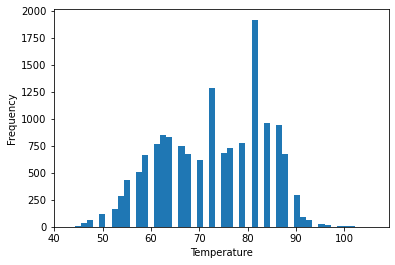

In [15]:
plt.hist(dff.Temperature, bins=50)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

In [16]:
dff21=dff.loc[dff['Year'] == 2021]
dff20=dff.loc[dff['Year'] == 2020]
dff19=dff.loc[dff['Year'] == 2019]

Text(0, 0.5, 'Frequency')

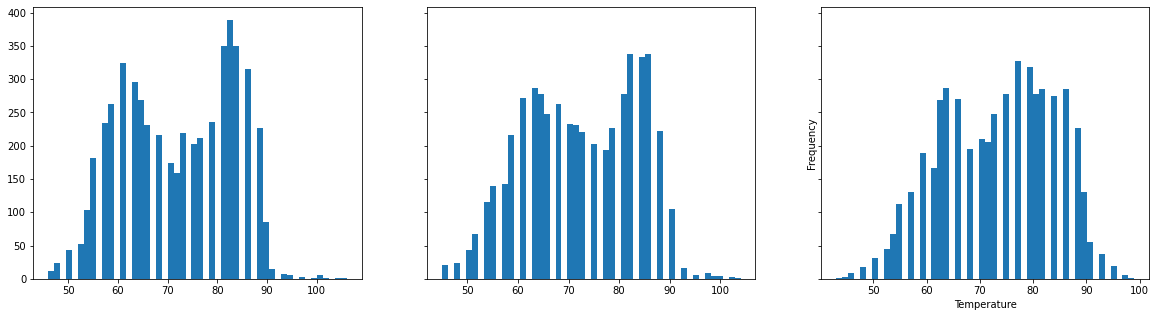

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5),sharey=True)
axs[0].hist(dff19.Temperature, bins=50)
axs[1].hist(dff20.Temperature, bins=50)
axs[2].hist(dff21.Temperature, bins=50)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

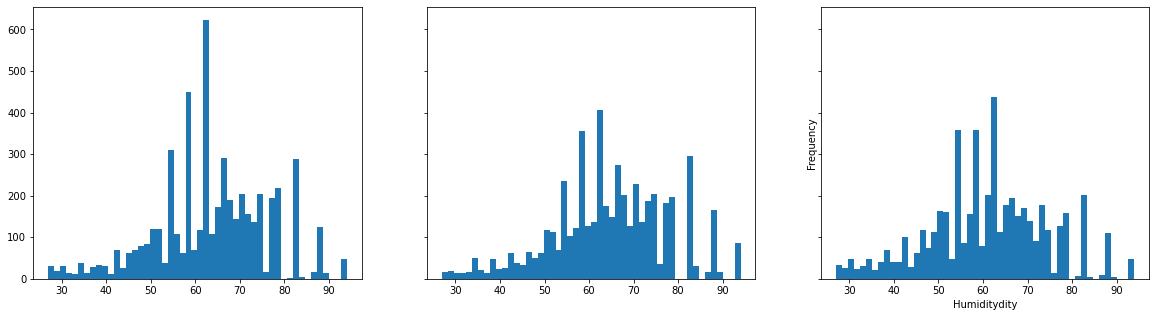

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5),sharey=True)
axs[0].hist(dff19.Humidity, bins=50)
axs[1].hist(dff20.Humidity, bins=50)
axs[2].hist(dff21.Humidity, bins=50)
plt.xlabel("Humiditydity")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

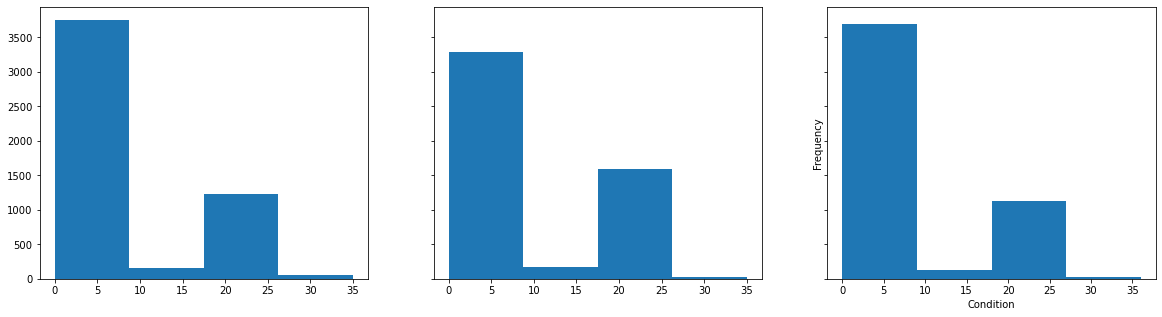

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5),sharey=True)
axs[0].hist(dff19.Condition, bins=4)
axs[1].hist(dff20.Condition, bins=4)
axs[2].hist(dff21.Condition, bins=4)
plt.xlabel("Condition")
plt.ylabel("Frequency")

In [20]:
def printPlot(month19,month20,month21,col):
    labels = ['Jan','Fab','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

    x = np.arange(12)
    for i in x:
        x[i]=x[i]+1
    width = 0.4

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/3, month19, width, label='2019')
    rects2 = ax.bar(x + width/3, month20, width+0.15, label='2020')
    rects3 = ax.bar(x + width/3, month21, width, label='2021')

    ax.set_ylabel(col+' average')
    ax.set_title(col+' average by month')
    ax.set_xticks(x, labels)
    ax.set_xlabel("month's")

    ax.legend()

    fig.tight_layout()

    plt.show()


In [21]:
def month(dff,m,col):
    for i in range(1,13):
        a = dff.loc[dff['Month'] == i]
        m.append(a[col].mean())

In [22]:
month19=[]
month20=[]
month21=[]

<ipython-input-20-347a1ff8d82b>:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x, labels)


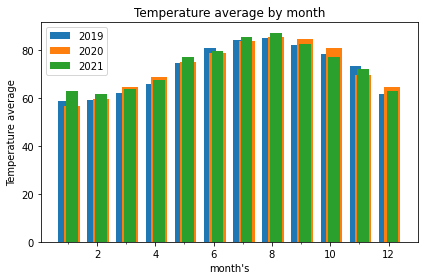

In [23]:
month(dff19,month19,'Temperature')
month(dff20,month20,'Temperature')
month(dff21,month21,'Temperature')
printPlot(month19,month20,month21,'Temperature')
month19=[]
month20=[]
month21=[]

<ipython-input-20-347a1ff8d82b>:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x, labels)


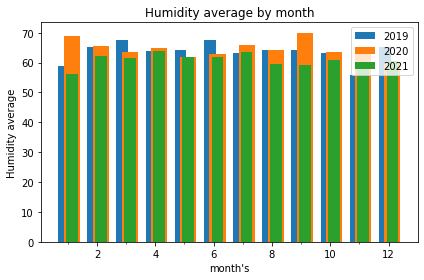

In [24]:
month(dff19,month19,'Humidity')
month(dff20,month20,'Humidity')
month(dff21,month21,'Humidity')
printPlot(month19,month20,month21,'Humidity')
month19=[]
month20=[]
month21=[]

<ipython-input-20-347a1ff8d82b>:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x, labels)


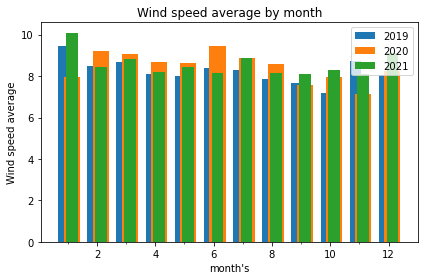

In [25]:
month(dff19,month19,'Wind speed')
month(dff20,month20,'Wind speed')
month(dff21,month21,'Wind speed')
printPlot(month19,month20,month21,'Wind speed')

  נבדוק קורלציה בין המשתנים


In [26]:
dff19['Temperature_Bind'] = pd.cut(dff19['Temperature'], [40, 50, 60, 70, 80, 90, 100], labels = ['50', '60', '70', '80', '90', '100'])
dff20['Temperature_Bind'] = pd.cut(dff20['Temperature'], [40, 50, 60, 70, 80, 90, 100], labels = ['50', '60', '70', '80', '90', '100'])
dff21['Temperature_Bind'] = pd.cut(dff21['Temperature'], [40, 50, 60, 70, 80, 90, 100], labels = ['50', '60', '70', '80', '90', '100'])

<ipython-input-26-5164b1c9ca9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff19['Temperature_Bind'] = pd.cut(dff19['Temperature'], [40, 50, 60, 70, 80, 90, 100], labels = ['50', '60', '70', '80', '90', '100'])
<ipython-input-26-5164b1c9ca9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff20['Temperature_Bind'] = pd.cut(dff20['Temperature'], [40, 50, 60, 70, 80, 90, 100], labels = ['50', '60', '70', '80', '90', '100'])
<ipython-input-26-5164b1c9ca9f>:3: SettingWithCopyWarning: 
A value is trying 

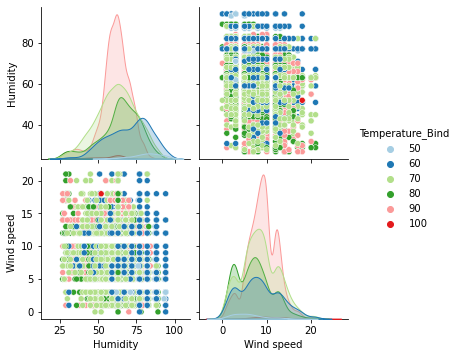

In [27]:
sns.pairplot(dff19[["Temperature_Bind","Humidity","Wind speed"]],hue='Temperature_Bind',palette="Paired")

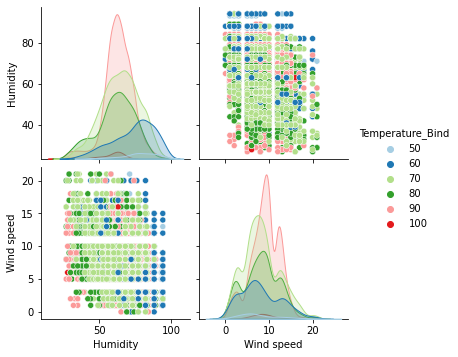

In [28]:
sns.pairplot(dff20[["Temperature_Bind","Humidity","Wind speed"]],hue='Temperature_Bind',palette="Paired")

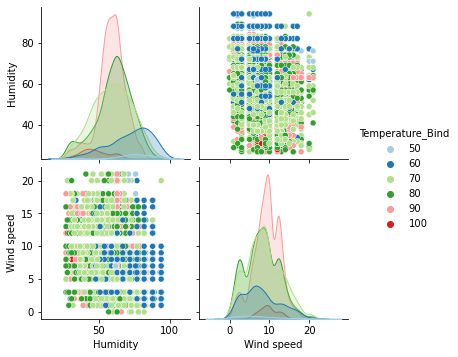

In [29]:
sns.pairplot(dff21[["Temperature_Bind","Humidity","Wind speed"]],hue='Temperature_Bind',palette="Paired")

In [30]:
dff.corr()

,Time,Temperature,Dew_point,Humidity,Wind,Wind speed,Wind gust,Pressure,Condition,Day,Month,Year
Time,1.000000,-0.001383,-0.080412,-0.102868,0.010079,0.023956,NaN,0.087153,-0.014231,0.000106,-0.012776,0.000072
Temperature,-0.001383,1.000000,0.724329,-0.262014,0.040585,0.105876,NaN,-0.640400,-0.175149,-0.020686,0.403081,0.053762
Dew_point,-0.080412,0.724329,1.000000,0.301428,0.155402,-0.111618,NaN,-0.625529,0.009194,0.002552,0.315049,-0.001097
Humidity,-0.102868,-0.262014,0.301428,1.000000,0.074602,-0.310369,NaN,-0.032041,0.229932,0.020835,-0.038241,-0.085129
Wind,0.010079,0.040585,0.155402,0.074602,1.000000,-0.222775,NaN,-0.215207,0.230624,0.018024,-0.071272,0.008799
Wind speed,0.023956,0.105876,-0.111618,-0.310369,-0.222775,1.000000,NaN,-0.084266,0.019647,0.004635,-0.080345,0.032816
Wind gust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure,0.087153,-0.640400,-0.625529,-0.032041,-0.215207,-0.084266,NaN,1.000000,-0.039317,-0.032312,-0.158864,0.029080
Condition,-0.014231,-0.175149,0.009194,0.229932,0.230624,0.019647,NaN,-0.039317,1.000000,-0.005319,-0.096006,-0.018858
Day,0.000106,-0.020686,0.002552,0.020835,0.018024,0.004635,NaN,-0.032312,-0.005319,1.000000,-0.002443,-0.008199


 למידת מכונה

In [31]:
listToDel=['Temperature_Bind']#,'Wind gust']
for col in listToDel:
    del dff19[col]
    del dff20[col]
    del dff21[col]

In [32]:
dff19P=dff19.drop(columns=['Temperature','Time','Day','Month','Year'])
dff20P=dff20.drop(columns=['Temperature','Time','Day','Month','Year'])
dff21P=dff21.drop(columns=['Temperature','Time','Day','Month','Year'])

In [33]:
def pred(X_train,y_train,X_test,y_test,text):
    clf=LinearRegression()
    clf.fit(X_train,y_train)
    predicted_val = clf.predict(X_test)
    y_pred_1st= pd.Series(predicted_val,index=X_test.index)
    print("the prediction of "+text+" in 08/03/2021 is: "+str(predicted_val[3000]))
    print("the REAL result of "+text+" in 08/03/2021 is: "+str(y_test[3000]))
    return r2_score(y_test,y_pred_1st)

In [34]:
dff.iloc[3000]

Time            550.0
Temperature      88.0
Dew_point        73.0
Humidity         62.0
Wind              8.0
Wind speed        7.0
Wind gust         0.0
Pressure       2965.0
Condition         4.0
Day               3.0
Month             8.0
Year           2021.0
Name: 3000, dtype: float64

In [35]:
score19T = pred(dff19P,dff19['Temperature'],dff21P,dff21['Temperature'],"Temperature")
print("the R2_score is: "+str(score19T))

the prediction of Temperature in 08/03/2021 is: 88.07256052622864
the REAL result of Temperature in 08/03/2021 is: 88.0
the R2_score is: 0.7876074217289569


In [36]:
score20T=pred(dff20P,dff20['Temperature'],dff21P,dff21['Temperature'],"Temperature")
print("the R2_score is: "+str(score20T))

the prediction of Temperature in 08/03/2021 is: 88.237391998384
the REAL result of Temperature in 08/03/2021 is: 88.0
the R2_score is: 0.7821515617473772


In [37]:
dff19P=dff19.drop(columns=['Humidity','Time','Day','Month','Year'])
dff20P=dff20.drop(columns=['Humidity','Time','Day','Month','Year'])
dff21P=dff21.drop(columns=['Humidity','Time','Day','Month','Year'])

In [38]:
score19H=pred(dff19P,dff19['Humidity'],dff21P,dff21['Humidity'],"Humidity")
print("the R2_score is: "+str(score19H))

the prediction of Humidity in 08/03/2021 is: 64.83543535221031
the REAL result of Humidity in 08/03/2021 is: 62.0
the R2_score is: 0.5858775713601438


In [39]:
score20H=pred(dff20P,dff20['Humidity'],dff21P,dff21['Humidity'],"Humidity")
print("the R2_score is: "+str(score20H))

the prediction of Humidity in 08/03/2021 is: 64.66557026576558
the REAL result of Humidity in 08/03/2021 is: 62.0
the R2_score is: 0.575284197210918


In [40]:
dff19P=dff19.drop(columns=['Wind speed','Time','Day','Month','Year'])
dff20P=dff20.drop(columns=['Wind speed','Time','Day','Month','Year'])
dff21P=dff21.drop(columns=['Wind speed','Time','Day','Month','Year'])

In [41]:
score19W =pred(dff19P,dff19['Wind speed'],dff21P,dff21['Wind speed'],"Wind speed")
print("the R2_score is: "+str(score19W))

the prediction of Wind speed in 08/03/2021 is: 9.516196524249608
the REAL result of Wind speed in 08/03/2021 is: 7.0
the R2_score is: 0.160458633116761


In [42]:
score20W=pred(dff20P,dff20['Wind speed'],dff21P,dff21['Wind speed'],"Wind speed")
print("the R2_score is: "+str(score20W))

the prediction of Wind speed in 08/03/2021 is: 9.516556208984525
the REAL result of Wind speed in 08/03/2021 is: 7.0
the R2_score is: 0.16241978717721028


In [43]:
dff19P=dff19.drop(columns=['Dew_point','Time','Day','Month','Year'])
dff20P=dff20.drop(columns=['Dew_point','Time','Day','Month','Year'])
dff21P=dff21.drop(columns=['Dew_point','Time','Day','Month','Year'])

In [44]:
score19W =pred(dff19P,dff19['Dew_point'],dff21P,dff21['Dew_point'],"Dew point")
print("the R2_score is: "+str(score19W))

the prediction of Dew point in 08/03/2021 is: 71.45467296999053
the REAL result of Dew point in 08/03/2021 is: 73.0
the R2_score is: 0.771446799252007


In [45]:
score20W=pred(dff20P,dff20['Dew_point'],dff21P,dff21['Dew_point'],"Dew point")
print("the R2_score is: "+str(score20W))

the prediction of Dew point in 08/03/2021 is: 71.14959458361255
the REAL result of Dew point in 08/03/2021 is: 73.0
the R2_score is: 0.7692304770436482
